# Import Data

In [1]:
import tensorflow
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../data/juliet.csv.zip')

In [4]:
y = data.iloc[:,6:]

In [7]:
y = y.drop(y.index[30000:33999])
y = y.drop(y.index[26000:27999])

In [12]:
y_label = y.iloc[x['type']]

In [5]:
x = pd.read_csv("../data/graph_all.csv.gz")

In [7]:
x['type'] = x['type'] - 1 

In [15]:
x = x.drop(columns="type")

In [16]:
!pip install sklearn

     |████████████████████████████████| 6.7MB 5.9MB/s eta 0:00:01     |██████████████▊                 | 3.1MB 2.5MB/s eta 0:00:02     |█████████████████               | 3.6MB 2.5MB/s eta 0:00:02
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [11]:
import sklearn

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_label, test_size = 0.2, random_state = 0)

In [18]:
y_train.shape

(48252, 122)

# [Neural tutorial](https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7)

In [41]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam
model = Sequential()

In [42]:
model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))

model.add(Dense(units=y_train.shape[1], activation='softmax'))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 122)               15738     
Total params: 65,274
Trainable params: 65,274
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer=Adadelta(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
48252/48252 [==============================] - 2s 43us/step - loss: 3.2069 - categorical_accuracy: 0.1963
Epoch 2/100
48252/48252 [==============================] - 2s 38us/step - loss: 2.3388 - categorical_accuracy: 0.3597
Epoch 3/100
48252/48252 [==============================] - 2s 38us/step - loss: 1.8715 - categorical_accuracy: 0.4591
Epoch 4/100
48252/48252 [==============================] - 2s 37us/step - loss: 1.5773 - categorical_accuracy: 0.5313
Epoch 5/100
48252/48252 [==============================] - 2s 37us/step - loss: 1.4115 - categorical_accuracy: 0.5728
Epoch 6/100
48252/48252 [==============================] - 2s 38us/step - loss: 1.3066 - categorical_accuracy: 0.6032
Epoch 7/100
48252/48252 [==============================] - 2s 37us/step - loss: 1.2252 - categorical_accuracy: 0.6264
Epoch 8/100
48252/48252 [==============================] - 2s 37us/step - loss: 1.1628 - categorical_accuracy: 0.6426
Epoch 9/100
48252/48252 [==============================]

48252/48252 [==============================] - 2s 36us/step - loss: 0.6345 - categorical_accuracy: 0.7975
Epoch 70/100
48252/48252 [==============================] - 2s 36us/step - loss: 0.6331 - categorical_accuracy: 0.7975
Epoch 71/100
48252/48252 [==============================] - 2s 37us/step - loss: 0.6302 - categorical_accuracy: 0.7993
Epoch 72/100
48252/48252 [==============================] - 2s 37us/step - loss: 0.6281 - categorical_accuracy: 0.7993
Epoch 73/100
48252/48252 [==============================] - 2s 38us/step - loss: 0.6271 - categorical_accuracy: 0.7986
Epoch 74/100
48252/48252 [==============================] - 2s 47us/step - loss: 0.6255 - categorical_accuracy: 0.8011
Epoch 75/100
48252/48252 [==============================] - 3s 56us/step - loss: 0.6232 - categorical_accuracy: 0.8005
Epoch 76/100
48252/48252 [==============================] - 2s 43us/step - loss: 0.6221 - categorical_accuracy: 0.8021
Epoch 77/100
48252/48252 [==============================] - 2

In [45]:
model.evaluate(x_test,y_test)

12064/12064 [==============================] - 0s 32us/step


[0.7057113086197041, 0.7721319628647215]

In [24]:
!pip install seaborn

In [25]:
import seaborn as sns
from sklearn import metrics
import matplotlib

In [26]:
y_predict= model.predict(x_test)

In [27]:
import numpy as np

In [28]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix((y_test.values+0).argmax(axis=1), y_predict.argmax(axis=1)), 
    index=['True Normal', 'True Bad'], 
    columns=['Predicted Normal', 'Predicted Bad'],
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(10, 8)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)

ValueError: Shape of passed values is (106, 106), indices imply (2, 2)

In [ ]:
confusion_matrices = metrics.multilabel_confusion_matrix(
    (y_test+0).values,
    np.rint(y_predict)
)

In [ ]:
for label, confusion_matrix in zip(y_test.columns, confusion_matrices):

    confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
    confusion_figure.set_size_inches(2, 1)
    confusion_axes.set_title(
        label + 
        '\n'  # hack to avoid overlap with x-axis labels below
    )
    confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
    _ = sns.heatmap(
        confusion_matrix,
        annot=True,
        fmt="d",
        cmap=sns.color_palette("Blues"),
        vmin=0,
        ax=confusion_axes,
    )

In [ ]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve((y_test.values+0).argmax(axis=1)-5, y_predict.argmax(axis=1)-5)

In [62]:
from sklearn.metrics import auc
import matplotlib.pyplot as plt
auc_keras = auc(fpr_keras, tpr_keras)

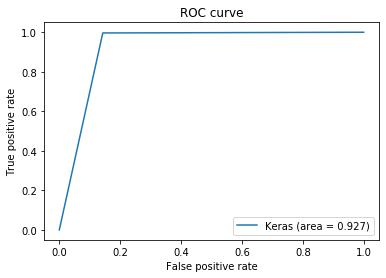

In [65]:
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

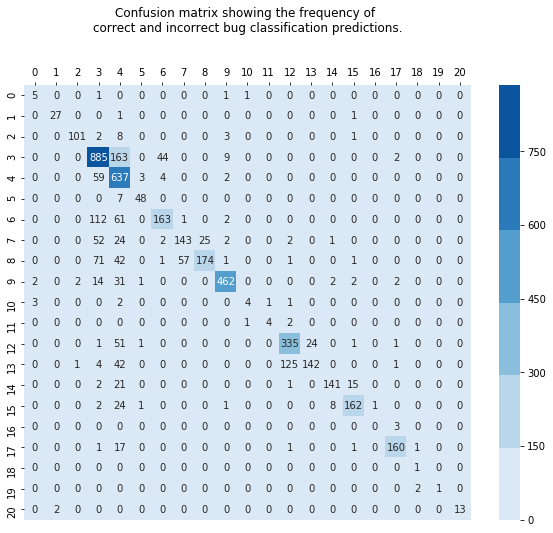

In [61]:
confusion_matrix = pd.DataFrame(
    data=metrics.confusion_matrix((y_test.values+0).argmax(axis=1), y_predict.argmax(axis=1)), 
 
)

confusion_figure, confusion_axes = matplotlib.pyplot.subplots()
confusion_figure.set_size_inches(10, 8)
confusion_axes.set_title(
    'Confusion matrix showing the frequency of \n'
    'correct and incorrect bug classification predictions.'
    '\n\n'  # hack to avoid overlap with x-axis labels below
)
confusion_axes.xaxis.tick_top()  # move x-axis labels to top of matrix
_ = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt="d",
    cmap=sns.color_palette("Blues"),
    vmin=0,
    ax=confusion_axes,
)